## Занятие 03. "Линейная регрессия"
Домашнее задание выполнено **Мельниковой Маргаритой**

---
### Задача
- Вот и подъехала к вам домашка по линейной регрессии. В буквальном смысле подъехала, потому что вы будете предсказывать стоимость автомобиля :) 
- Здесь вам нужно помнить всё, что обсуждали на прошлых занятиях, и подготовить данные так, чтобы максимально классно предсказывалась цена на автомобиль.
- Любые эксперименты идут в плюс. Покажите ваши аналитические способности.
- Подробней описывайте свои наблюдения, и что можно сделать с данными.
- Если возникнет идея взять сторонний датасет для обогащения данных, то это пойдёт вам в плюс :)

### Описание данных:

- Car_ID
Unique id of each observation (Interger)
- Symboling 
Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 
- carCompany
Name of car company (Categorical)
- fueltype
Car fuel type i.e gas or diesel (Categorical)
- aspiration
Aspiration used in a car (Categorical)
- doornumber
Number of doors in a car (Categorical)
- carbody
body of car (Categorical)
- drivewheel
type of drive wheel (Categorical)
- enginelocation
Location of car engine (Categorical)
- wheelbase
Weelbase of car (Numeric)
- carlength
Length of car (Numeric)
- carwidth
Width of car (Numeric)
- carheight
height of car (Numeric)
- curbweight
The weight of a car without occupants or baggage. (Numeric)
- enginetype
Type of engine. (Categorical)
- cylindernumber
cylinder placed in the car (Categorical)
- enginesize
Size of car (Numeric)
- fuelsystem
Fuel system of car (Categorical)
- boreratio
Boreratio of car (Numeric)
- stroke
Stroke or volume inside the engine (Numeric)
- compressionratio
compression ratio of car (Numeric)
- horsepower
Horsepower (Numeric)
- peakrpm
car peak rpm (Numeric)
- citympg
Mileage in city (Numeric)
- highwaympg
Mileage on highway (Numeric)
- price(Dependent variable)
Price of car (Numeric)

---
### Решение

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFE

In [2]:
# importing dataset
url_part01 = 'https://drive.google.com/file/d/1XZqpDxNHW71azMoqcq81G_JsD85eSzsL/view?usp=sharing'
path_part01 = 'https://drive.google.com/uc?export=download&id=' + url_part01.split('/')[-2]

url_part02 = 'https://drive.google.com/file/d/1UZju70jseeF_Cf7IbaPQuqOv80RNtGBU/view?usp=sharing'
path_part02 = 'https://drive.google.com/uc?export=download&id=' + url_part02.split('/')[-2]

data_part01 = pd.read_csv(path_part01)
data_part02 = pd.read_csv(path_part02, sep='\t')

##### Знакомство с данными
##### data_part01

In [3]:
data_part01.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [4]:
data_part01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
len((list(data_part01.columns)))

26

> Распишем переменные по типам, согласно описанию и того, что наблюдаем в данных.

In [6]:
f_p01_numeric = [
    'wheelbase',
    'carlength',
    'carwidth',
    'carheight',
    'curbweight',
    'enginesize',
    'boreratio',
     'stroke',
     'compressionratio',
     'horsepower',
     'peakrpm',
     'citympg',
     'highwaympg'] # числовые переменные

f_p01_cat_num = [
    'symboling'] # категориальные, где категории представлены в виде целых чисел

f_p01_cat_abc = [
    'fueltype',
    'aspiration',
    'carbody',
    'drivewheel',
    'enginelocation',
    'enginetype',
    'fuelsystem'] # категориальные, где категории в буквенном виде

f_p01_mixed = [
    'doornumber', 
    'cylindernumber' ] # вид категориальной, но, возможно, по сути числовая переменная

f_other = [
    'car_ID',
    'CarName'
] # все остальные переменные

p01_target = [
     'price' ] # целевое значение

In [7]:
assert len(f_p01_numeric) + len(f_p01_cat_num ) + len(f_p01_cat_abc) + len(f_p01_mixed) + len(p01_target) + len(f_other) == data_part01.shape[1], 'Check split'

##### Работа с типами данных и пропусками
> 'f_p01_numeric'

In [8]:
data_part01[f_p01_numeric].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelbase         205 non-null    float64
 1   carlength         205 non-null    float64
 2   carwidth          205 non-null    float64
 3   carheight         205 non-null    float64
 4   curbweight        205 non-null    int64  
 5   enginesize        205 non-null    int64  
 6   boreratio         205 non-null    float64
 7   stroke            205 non-null    float64
 8   compressionratio  205 non-null    float64
 9   horsepower        205 non-null    int64  
 10  peakrpm           205 non-null    int64  
 11  citympg           205 non-null    int64  
 12  highwaympg        205 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 20.9 KB


> Пропусков нет в переменных 'f_p01_numeric' - все 205 строк имеют значения </br>
> Типы переменных менять тоже не нужно

> 'f_p01_cat_num'

In [9]:
data_part01[f_p01_cat_num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   symboling  205 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


In [10]:
data_part01['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

> Пропусков нет в переменных 'f_p01_numeric' - все 205 строк имеют значения </br>
> Типы переменных менять тоже не нужно

> 'f_p01_cat_abc'

In [11]:
data_part01[f_p01_cat_abc].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   fueltype        205 non-null    object
 1   aspiration      205 non-null    object
 2   carbody         205 non-null    object
 3   drivewheel      205 non-null    object
 4   enginelocation  205 non-null    object
 5   enginetype      205 non-null    object
 6   fuelsystem      205 non-null    object
dtypes: object(7)
memory usage: 11.3+ KB


In [12]:
for f in f_p01_cat_abc:
    print('Количество записей:')
    print(data_part01[f].value_counts())
    print('Структура записей:')
    print(data_part01[f].value_counts() / len(data_part01[f]) * 100)
    print('-----')

Количество записей:
gas       185
diesel     20
Name: fueltype, dtype: int64
Структура записей:
gas       90.243902
diesel     9.756098
Name: fueltype, dtype: float64
-----
Количество записей:
std      168
turbo     37
Name: aspiration, dtype: int64
Структура записей:
std      81.95122
turbo    18.04878
Name: aspiration, dtype: float64
-----
Количество записей:
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
Структура записей:
sedan          46.829268
hatchback      34.146341
wagon          12.195122
hardtop         3.902439
convertible     2.926829
Name: carbody, dtype: float64
-----
Количество записей:
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
Структура записей:
fwd    58.536585
rwd    37.073171
4wd     4.390244
Name: drivewheel, dtype: float64
-----
Количество записей:
front    202
rear       3
Name: enginelocation, dtype: int64
Структура записей:
front    98.536585
rear      1.463415
Name: e

> Пропусков нет в переменных 'f_p01_cat_abc' - все 205 строк имеют значения </br>
> Типы переменных менять тоже не нужно </br>
> Также хочется отметить, несбалансированность категорий внутри переменных. Есть гипотеза, что модель будет работать хорошо только на популярных вариантах. 

> 'f_p01_mixed'

In [13]:
data_part01[f_p01_mixed].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   doornumber      205 non-null    object
 1   cylindernumber  205 non-null    object
dtypes: object(2)
memory usage: 3.3+ KB


In [14]:
for f in f_p01_mixed:
    print(data_part01[f].value_counts())
    print('---')

four    115
two      90
Name: doornumber, dtype: int64
---
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64
---


> Пропусков нет в переменных 'f_p01_mixed' - все 205 строк имеют значения </br>
> Типы переменных менять тоже не нужно </br>
> Гипотеза подтвердилась, в рамках Feature Engineering переведу слова цифр в цифры

> 'f_other'

In [15]:
data_part01[f_other].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   car_ID   205 non-null    int64 
 1   CarName  205 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.3+ KB


In [16]:
for f in f_other:
    print(data_part01[f].value_counts())
    print('---')

1      1
142    1
132    1
133    1
134    1
      ..
72     1
73     1
74     1
75     1
205    1
Name: car_ID, Length: 205, dtype: int64
---
toyota corolla           6
toyota corona            6
peugeot 504              6
subaru dl                4
honda civic              3
                        ..
Nissan versa             1
volkswagen type 3        1
peugeot 304              1
buick century special    1
nissan titan             1
Name: CarName, Length: 147, dtype: int64
---


> Пропусков нет в переменных 'f_other' - все 205 строк имеют значения </br>
> Типы переменных менять тоже не нужно </br>
> В рамках Feature Engineering выделю название брендов

##### Feature Engineering
> Перевод 'f_p01_mixed' в цифры

In [17]:
dir_words_to_num = {
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
}
data_part01['doornumber_int'] = data_part01['doornumber'].replace(dir_words_to_num)
data_part01['cylindernumber_int'] = data_part01['cylindernumber'].replace(dir_words_to_num)

In [18]:
# для ohe
dir_doors = {
    'two': 'two_doors',
    'four': 'four_doors'
}

dir_cylinders = {
    'two': '2_cylinders',
    'three': '3_cylinders',
    'four': '4_cylinders',
    'five': '5_cylinders',
    'six': '6_cylinders',
    'eight': '8_cylinders',
    'twelve': '12_cylinders'
}


data_part01['doornumber'] = data_part01['doornumber'].replace(dir_doors)
data_part01['cylindernumber'] = data_part01['cylindernumber'].replace(dir_cylinders)

In [19]:
data_part01[['doornumber_int', 'doornumber', 'cylindernumber', 'cylindernumber_int']].tail(2)

,doornumber_int,doornumber,cylindernumber,cylindernumber_int
203,4,four_doors,6_cylinders,6
204,4,four_doors,4_cylinders,4


> Выделение названия бренда из 'CarName'

In [20]:
data_part01['car_brand'] = data_part01['CarName'].apply(lambda x: x.split(' ')[0])
data_part01['car_brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

> Есть опечатки в названиях брендов, поправим:

In [21]:
dir_brands = {
    'maxda': 'mazda',
    'Nissan': 'nissan',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}
data_part01['car_brand'] = data_part01['car_brand'].replace(dir_brands)
data_part01['car_brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Рассчитаем объем и плотность машины (может, не точно, но будет интересно посмотреть)

In [22]:
data_part01['volume'] = data_part01['carlength'] * data_part01['carwidth'] * data_part01['carheight']
data_part01['density'] = data_part01['curbweight'] / data_part01['volume']

Рассчитаем Combined MPG - "Combined fuel economy is a weighted average of City and Highway MPG values that is calculated by weighting the City value by 55% and the Highway value by 45%." https://www.epa.gov/fueleconomy/text-version-gasoline-label

In [23]:
data_part01['combined_MPG'] = (0.55 * data_part01['citympg']) + (0.45 * data_part01['highwaympg'])

> Теперь можно обновить списки переменных

In [24]:
data_part01.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'doornumber_int', 'cylindernumber_int', 'car_brand', 'volume',
       'density', 'combined_MPG'],
      dtype='object')

In [25]:
f_p01_num = [
    'wheelbase',
    'carlength',
    'carwidth',
    'carheight',
    'curbweight',
    'enginesize',
    'boreratio',
     'stroke',
     'compressionratio',
     'horsepower',
     'peakrpm',
     'citympg',
     'highwaympg',
    'doornumber_int',
    'cylindernumber_int',
    'volume',
    'density',
    'combined_MPG'
] # числовые переменные

f_p01_cat = [
    'fueltype',
    'aspiration',
    'carbody',
    'drivewheel',
    'enginelocation',
    'enginetype',
    'fuelsystem',
    'doornumber', 
    'cylindernumber',
    'symboling',
    'car_brand'
] # категориальные

f_other = [
    'car_ID',
    'CarName'
] # все остальные переменные

p01_target = [
     'price' ] # целевое значение

In [26]:
assert len(f_p01_num) + len(f_p01_cat ) + len(f_other) + len(p01_target) == data_part01.shape[1], 'Check split'

> OneHotEncoder </br>
Так как у нас модель линейной регрессии, то используем OneHotEncoder

In [27]:
ohe = OneHotEncoder()
ohe_matrix = ohe.fit_transform(data_part01[f_p01_cat])
ohe_matrix = ohe_matrix.toarray()

# формируем один список без вложений для наименования столбцов
ohe_cat_raw = ohe.categories_
f_p01_bin = [] # бинарные переменные

for cat in ohe_cat_raw:
    for label in cat:
        f_p01_bin.append(label)
        
df_ohe_matrix = pd.DataFrame(ohe_matrix, columns=f_p01_bin)
df_ohe_matrix.index = data_part01.index

df_ohe_matrix.head(5)

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
data_part01 = data_part01.join(df_ohe_matrix)

> Готовим датафреймы для дальнейшей работы

In [29]:
# data_part01 = data_part01[f_p01_num + f_p01_bin + p01_target]

#### Анализ переменных
> Целевая переменная - цена

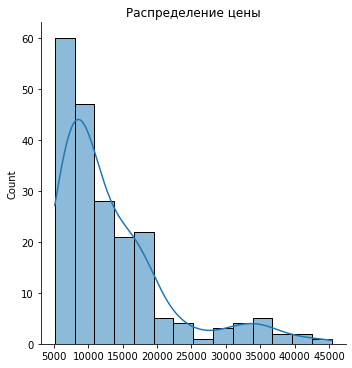

In [30]:
sns.displot(data=data_part01[p01_target], kde=True, legend=False).set(title='Распределение цены')
plt.show()

In [31]:
descr = data_part01['price'].describe()
ratio = descr['mean'] / descr['50%'] - 1
print(descr)
print('средняя цена отличается от медианы на {}%.'.format(round(ratio * 100)))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64
средняя цена отличается от медианы на 29%.


- Распределение цены скошено, средняя цена отличается от медианы на 29%. 

> Категориальные переменные

C:\Programs\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Programs\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Programs\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Programs\Anaconda3\lib\site-packages\sea

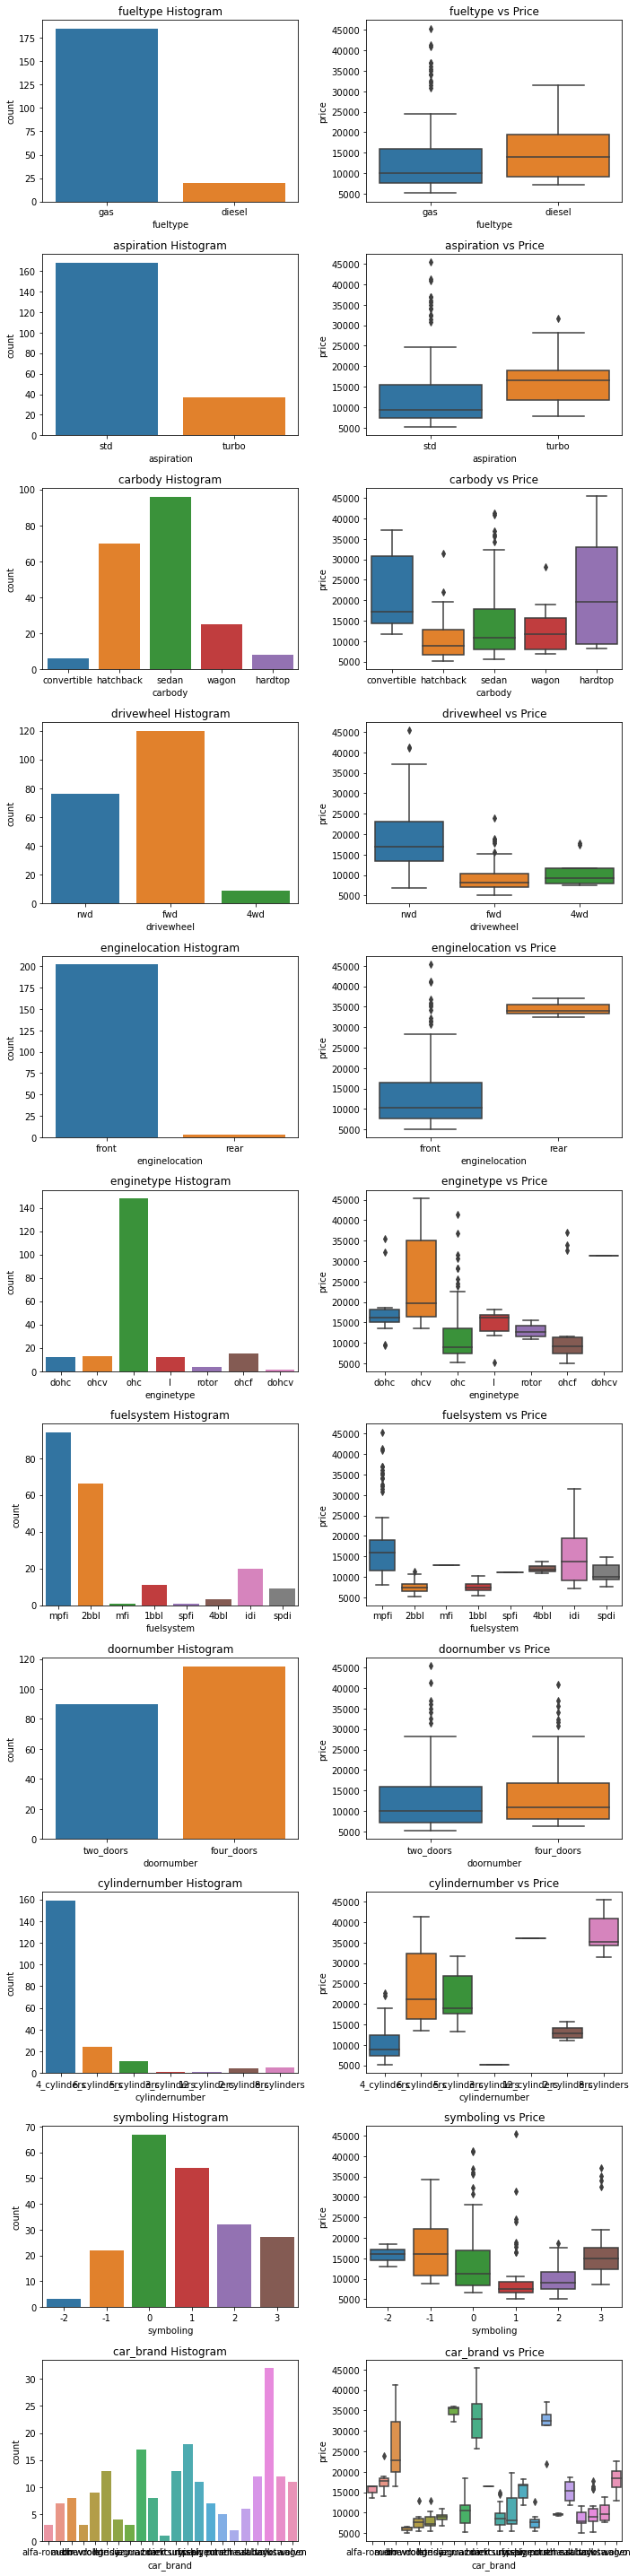

In [32]:
def plot_count(x, fig_ttl, fig_id):
    plt.subplot(fig_ttl, 2, fig_id)
    plt.title(x + ' Histogram')
    sns.countplot(data_part01[x])
    plt.subplot(fig_ttl, 2, (fig_id + 1))
    plt.title(x + ' vs Price')
    sns.boxplot(x=data_part01[x], y=data_part01['price'])
    
plt.figure(figsize=(10,40))

fig_ttl = len(f_p01_cat)
count = 0
for id, val in enumerate(f_p01_cat):
    plot_count(val, fig_ttl, count + id + 1)
    count += 1

plt.tight_layout()

<AxesSubplot:xlabel='car_brand', ylabel='price'>

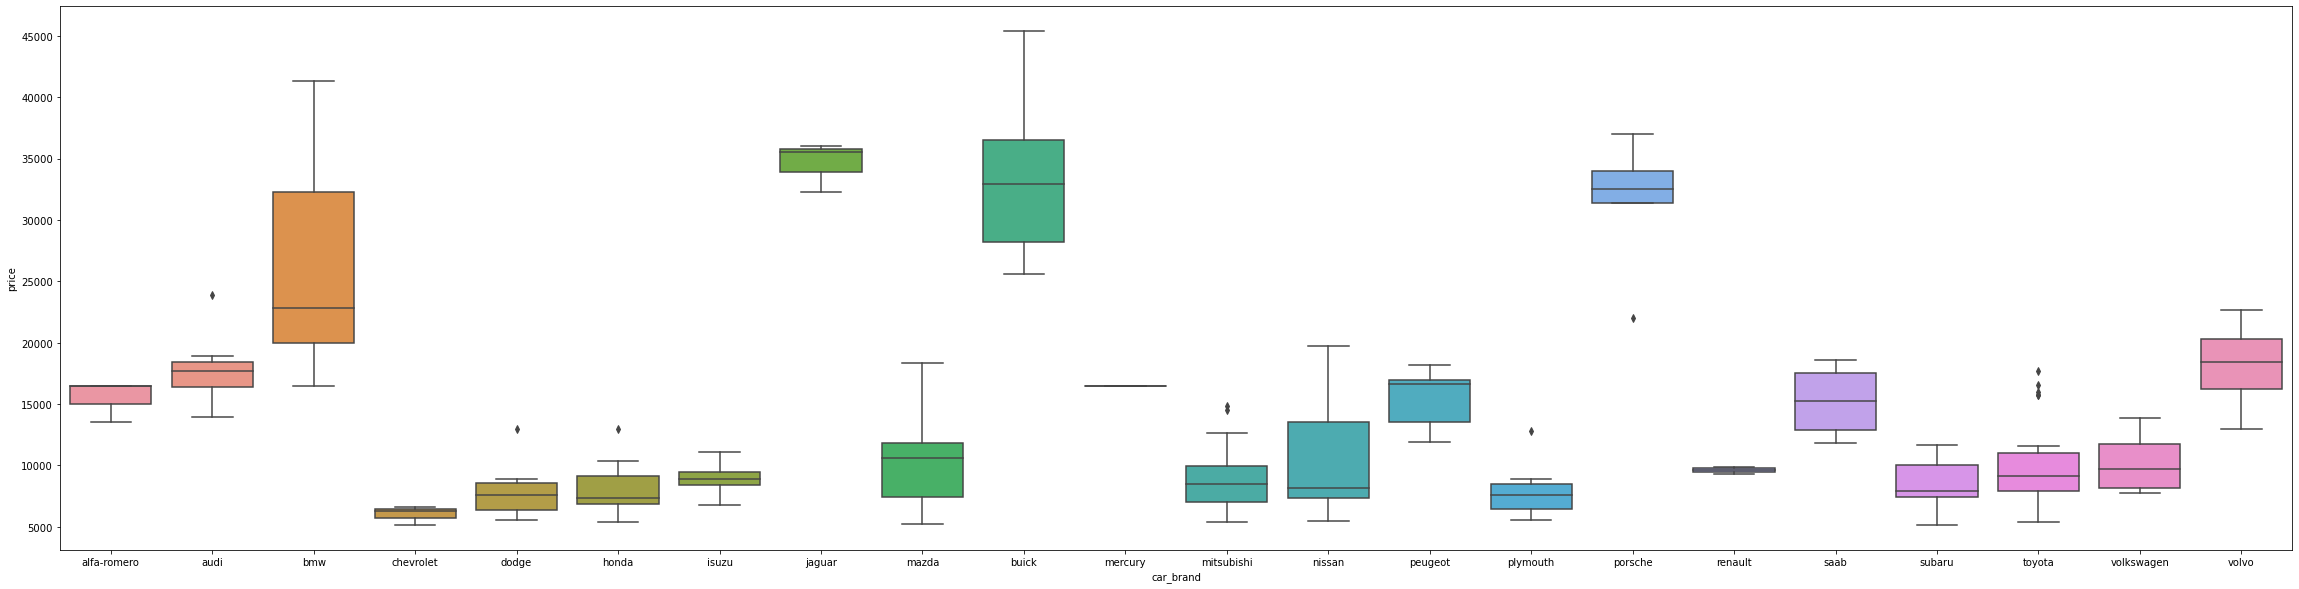

In [33]:
plt.figure(figsize=(40,10))
sns.boxplot(x=data_part01['car_brand'], y=data_part01['price'])

In [34]:
variables = ['diesel', 'gas']
print(variables)
df_corr_bin = pd.DataFrame(data_part01[variables + ['price']].corr(method='pearson')['price'] * 100).rename(columns={'price': 'corr_price'})
print(df_corr_bin)
print('==')

variables = ['std', 'turbo']
print(variables)
df_corr_bin = pd.DataFrame(data_part01[variables + ['price']].corr(method='pearson')['price'] * 100).rename(columns={'price': 'corr_price'})
print(df_corr_bin)
print('==')

variables = ['convertible',  'hardtop', 'hatchback', 'sedan', 'wagon']
print(variables)
df_corr_bin = pd.DataFrame(data_part01[variables + ['price']].corr(method='pearson')['price'] * 100).rename(columns={'price': 'corr_price'})
print(df_corr_bin)
print('==')

variables = ['4wd', 'fwd', 'rwd']
print(variables)
df_corr_bin = pd.DataFrame(data_part01[variables + ['price']].corr(method='pearson')['price'] * 100).rename(columns={'price': 'corr_price'})
print(df_corr_bin)
print('==')

variables = ['front', 'rear']
print(variables)
df_corr_bin = pd.DataFrame(data_part01[variables + ['price']].corr(method='pearson')['price'] * 100).rename(columns={'price': 'corr_price'})
print(df_corr_bin)
print('==')

variables = ['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor']
print(variables)
df_corr_bin = pd.DataFrame(data_part01[variables + ['price']].corr(method='pearson')['price'] * 100).rename(columns={'price': 'corr_price'})
print(df_corr_bin)
print('==')

variables = ['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi']
print(variables)
df_corr_bin = pd.DataFrame(data_part01[variables + ['price']].corr(method='pearson')['price'] * 100).rename(columns={'price': 'corr_price'})
print(df_corr_bin)
print('==')

variables = ['four_doors', 'two_doors']
print(variables)
df_corr_bin = pd.DataFrame(data_part01[variables + ['price']].corr(method='pearson')['price'] * 100).rename(columns={'price': 'corr_price'})
print(df_corr_bin)
print('==')

variables = ['12_cylinders', '2_cylinders', '3_cylinders', '4_cylinders', '5_cylinders', '6_cylinders', '8_cylinders']
print(variables)
df_corr_bin = pd.DataFrame(data_part01[variables + ['price']].corr(method='pearson')['price'] * 100).rename(columns={'price': 'corr_price'})
print(df_corr_bin)
print('==')

variables = [-2, -1, 0, 1, 2, 3]
print(variables)
df_corr_bin = pd.DataFrame(data_part01[variables + ['price']].corr(method='pearson')['price'] * 100).rename(columns={'price': 'corr_price'})
print(df_corr_bin)
print('==')

variables = ['alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']
print(variables)
df_corr_bin = pd.DataFrame(data_part01[variables + ['price']].corr(method='pearson')['price'] * 100).rename(columns={'price': 'corr_price'})
print(df_corr_bin)
print('==')

['diesel', 'gas']
        corr_price
diesel   10.567948
gas     -10.567948
price   100.000000
==
['std', 'turbo']
       corr_price
std    -17.792622
turbo   17.792622
price  100.000000
==
['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon']
             corr_price
convertible   18.768121
hardtop       22.585401
hatchback    -26.203922
sedan         12.571648
wagon         -4.230971
price        100.000000
==
['4wd', 'fwd', 'rwd']
       corr_price
4wd     -5.886614
fwd    -60.195030
rwd     63.895654
price  100.000000
==
['front', 'rear']
       corr_price
front   -32.49733
rear     32.49733
price   100.00000
==
['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor']
       corr_price
dohc    15.142878
dohcv   15.922504
l        4.226724
ohc    -34.427015
ohcf     1.628487
ohcv    38.599128
rotor   -0.454416
price  100.000000
==
['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi']
       corr_price
1bbl   -17.094540
2bbl   -50.137434
4bbl    -1.730604
idi     10.567948
m

In [35]:
df_corr_bin = pd.DataFrame(data_part01[f_p01_bin + ['price']].corr(method='pearson')['price'] * 100).rename(columns={'price': 'corr_price'})
df_corr_bin[(df_corr_bin['corr_price'] > 30) | (df_corr_bin['corr_price'] < -30)]

,corr_price
fwd,-60.195030
rwd,63.895654
front,-32.497330
rear,32.497330
ohc,-34.427015
ohcv,38.599128
2bbl,-50.137434
mpfi,51.707499
4_cylinders,-69.776166
6_cylinders,47.497791


> Гипотеза, что более дорогие марки - более рискованы для страховых, т.к. они часто позиционируются как для спортивной езды и в случае повреждения/угона они дороже </br>
> Гипотеза не подтвердилась, а жаль..

In [36]:
extract = data_part01.groupby(['car_brand', 'symboling'])['price'].agg(['mean', 'median', 'count']).reset_index()
extract['diff'] = round((extract['median'] / extract['mean']) * 100 - 100,2)
extract

,car_brand,symboling,mean,median,count,diff
0,alfa-romero,1,16500.000000,16500.000,1,0.00
1,alfa-romero,3,14997.500000,14997.500,2,0.00
2,audi,0,17859.167000,17859.167,1,0.00
3,audi,1,20168.333333,18920.000,3,-6.19
4,audi,2,15550.000000,15250.000,3,-1.93
5,bmw,0,27992.500000,25932.500,6,-7.36
6,bmw,1,24565.000000,24565.000,1,0.00
7,bmw,2,16430.000000,16430.000,1,0.00
8,buick,-1,29896.000000,29924.000,4,0.09
9,buick,0,34568.000000,34568.000,2,0.00


**Не включаем в модель:**
- Переменные категорий $fueltype$, $aspiration$, $doornumber$ для целей построения модели нам неинтересны - распределение машин по ценам внутри категорий достаточно похоже, низкий коэффициент корреляции Пирсона.Скорее всего, для категорий $fueltype$, $aspiration$ это вызвано недопредставленностью подкатегорий $diesel$ и $turbo$.

**Включаем в модель:**
- Из $carbody$ интересна подкатегория $hatchback$ - достаточно преставлена и имеет повыше коэффициент корреляции Пирсона.
- Из $enginelocation$ выберу $front$, как наиболее представленный класс ($rear$ не возьмем, чтобы избежать мультиколлинеарности)
- Из $drivewheel$ выберу $4wd$ и $rwd$. Все 3 категории не возьму, чтобы убрать мультиколлинеарность фичей.
- Из $enginetype$ выберу $ohc$.
- Из $fuelsystem$ выберу $2bbl$, $mpfi$
- Из $cylindernumber$ интересны подкатегории $4_cylinders$, $6_cylinders$ и $8_cylinders$.
- Из _**брендов машин**_ наиболее интересны премиальные бренды - $bmw$, $buick$, $jaguar$, $porsche$ (демиана выше 20000 у.е.).

Таким образом из 66 бинарных переменных выбрала 14. Потенциально некоторые фичи (типа брендов) можно будет объединить.
Изучим их на мультиколлинеарность.

In [37]:
f_p01_bin_selected = ['hatchback', 'front', 'rwd', 'ohc', '2bbl', 'mpfi', '4_cylinders', '6_cylinders', '8_cylinders', 'bmw', 'buick', 'jaguar', 'porsche']
len(f_p01_bin), len(f_p01_bin_selected)

(66, 13)

<AxesSubplot:>

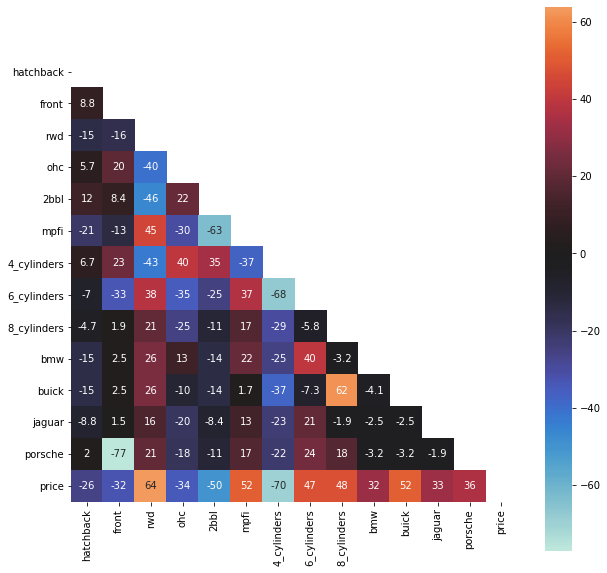

In [38]:
fig, ax = plt.subplots(figsize=(10,10))
corr = data_part01[f_p01_bin_selected + ['price']].corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr * 100, center=0, annot=True, square=True, ax=ax, mask=mask)

In [39]:
extract = data_part01.groupby(['car_brand'])['price'].agg(['mean', 'median', 'count']).reset_index()
extract['diff'] = round((extract['median'] / extract['mean']) * 100 - 100,2)
extract.sort_values(by='median')

,car_brand,mean,median,count,diff
4,chevrolet,6007.000000,6295.0,3,4.79
6,honda,8184.692308,7295.0,13,-10.87
5,dodge,7875.444444,7609.0,9,-3.38
14,plymouth,7963.428571,7609.0,7,-4.45
18,subaru,8541.250000,7894.0,12,-7.58
12,nissan,10415.666667,8124.0,18,-22.00
11,mitsubishi,9239.769231,8499.0,13,-8.02
7,isuzu,8916.500000,8916.5,4,0.00
19,toyota,9885.812500,9103.0,32,-7.92
16,renault,9595.000000,9595.0,2,0.00


In [40]:
extract = data_part01.groupby(['car_brand', 'fuelsystem'])['price'].agg(['mean', 'median', 'count']).reset_index()
extract['diff'] = round((extract['median'] / extract['mean']) * 100 - 100,2)
extract

,car_brand,fuelsystem,mean,median,count,diff
0,alfa-romero,mpfi,15498.333333,16500.0,3,6.46
1,audi,mpfi,17859.166714,17710.0,7,-0.84
2,bmw,mpfi,26118.750000,22835.0,8,-12.57
3,buick,idi,28394.000000,28212.0,4,-0.64
4,buick,mpfi,38900.000000,38008.0,4,-2.29
5,chevrolet,2bbl,6007.000000,6295.0,3,4.79
6,dodge,2bbl,6900.000000,6534.5,6,-5.30
7,dodge,mfi,12964.000000,12964.0,1,0.00
8,dodge,mpfi,8257.500000,8257.5,2,0.00
9,honda,1bbl,7555.545455,7295.0,11,-3.45


In [41]:
extract = data_part01.groupby(['fuelsystem','enginetype'])['price'].agg(['mean', 'median', 'count']).reset_index()
extract['diff'] = round((extract['median'] / extract['mean']) * 100 - 100,2)
extract

,fuelsystem,enginetype,mean,median,count,diff
0,1bbl,ohc,7555.545455,7295.0,11,-3.45
1,2bbl,l,5151.000000,5151.0,1,0.00
2,2bbl,ohc,7526.719298,7349.0,57,-2.36
3,2bbl,ohcf,7423.000000,7533.0,8,1.48
4,4bbl,rotor,12145.000000,11845.0,3,-2.47
5,idi,l,15797.000000,16900.0,5,6.98
6,idi,ohc,15851.866667,10795.0,15,-31.90
7,mfi,ohc,12964.000000,12964.0,1,0.00
8,mpfi,dohc,18116.416667,16249.0,12,-10.31
9,mpfi,dohcv,31400.500000,31400.5,1,0.00


In [42]:
extract = data_part01.groupby(['drivewheel', 'fuelsystem'])['price'].agg(['mean', 'median', 'count']).reset_index()
extract['diff'] = round((extract['median'] / extract['mean']) * 100 - 100,2)
extract

,drivewheel,fuelsystem,mean,median,count,diff
0,4wd,2bbl,8305.000000,8013.0,5,-3.52
1,4wd,mpfi,14565.541750,14572.0,4,0.04
2,fwd,1bbl,7555.545455,7295.0,11,-3.45
3,fwd,2bbl,7395.724138,7162.0,58,-3.16
4,fwd,idi,9265.333333,7995.0,9,-13.71
5,fwd,mfi,12964.000000,12964.0,1,0.00
6,fwd,mpfi,12550.060606,11850.0,33,-5.58
7,fwd,spdi,10768.750000,9619.0,8,-10.68
8,rwd,2bbl,7693.666667,8058.0,3,4.74
9,rwd,4bbl,12145.000000,11845.0,3,-2.47


In [43]:
extract = data_part01.groupby(['fuelsystem', 'drivewheel'])['price'].agg(['mean', 'median', 'count']).reset_index()
extract['diff'] = round((extract['median'] / extract['mean']) * 100 - 100,2)
extract

,fuelsystem,drivewheel,mean,median,count,diff
0,1bbl,fwd,7555.545455,7295.0,11,-3.45
1,2bbl,4wd,8305.000000,8013.0,5,-3.52
2,2bbl,fwd,7395.724138,7162.0,58,-3.16
3,2bbl,rwd,7693.666667,8058.0,3,4.74
4,4bbl,rwd,12145.000000,11845.0,3,-2.47
5,idi,fwd,9265.333333,7995.0,9,-13.71
6,idi,rwd,21215.909091,18344.0,11,-13.54
7,mfi,fwd,12964.000000,12964.0,1,0.00
8,mpfi,4wd,14565.541750,14572.0,4,0.04
9,mpfi,fwd,12550.060606,11850.0,33,-5.58


Между фичами есть достаточно высокие значения коэффициента корреляции.
- Например, система впрыска топлива mpfi распространена в выбранных брендах (https://carmanz.com/audi/80-1991-1995/13502-a8019917-32.html)
- Распредвал OHC очень распространен среди систем впрыска топлива mpfi и 2bbl (https://autoradar.top/raspredval-ohv-ohc-sohc-i-dohc-v-chem-raznica/)
Уберем ряд переменных.


In [44]:
feat_remove = ['6_cylinders', '8_cylinders', 'front', 'mpfi', 'ohc', '2bbl', 'rwd']
for el in feat_remove:
    f_p01_bin_selected.remove(el)
len(f_p01_bin_selected)

6

<AxesSubplot:>

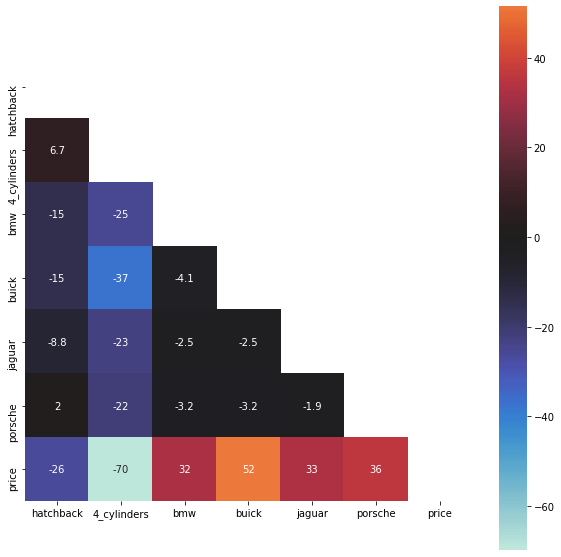

In [45]:
fig, ax = plt.subplots(figsize=(10,10))
corr = data_part01[f_p01_bin_selected + ['price']].corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr * 100, center=0, annot=True, square=True, ax=ax, mask=mask)

In [46]:
f_p01_bin_selected

['hatchback', '4_cylinders', 'bmw', 'buick', 'jaguar', 'porsche']

**Включаем в модель:** 'hatchback', 'rwd', 'bmw', 'buick', 'jaguar', 'porsche'

Таким образом из 66 бинарных переменных выбрала 6. Потенциально некоторые фичи (типа брендов) можно будет объединить

> 'f_p01_num'

In [47]:
len(f_p01_num)

18

<AxesSubplot:>

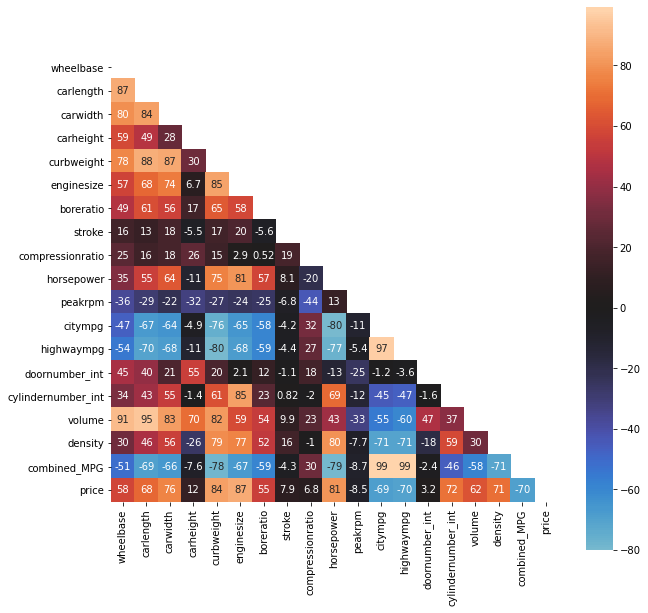

In [48]:
fig, ax = plt.subplots(figsize=(10,10))
corr = data_part01[f_p01_num + ['price']].corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr * 100, center=0, annot=True, square=True, ax=ax, mask=mask)

<AxesSubplot:>

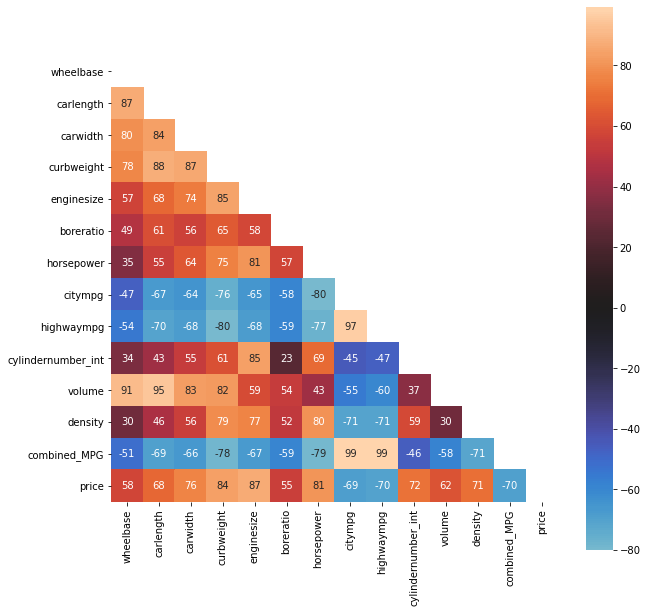

In [49]:
fig, ax = plt.subplots(figsize=(10,10))
corr = data_part01[['wheelbase',
 'carlength',
 'carwidth',
 'curbweight',
 'enginesize',
 'boreratio',
 'horsepower',
 'citympg',
 'highwaympg',
 'cylindernumber_int',
 'volume',
 'density',
'combined_MPG']+ ['price']].corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr * 100, center=0, annot=True, square=True, ax=ax, mask=mask)

- Ряд фичей имеют среднюю или сильную корреляцию с целевой переменной, что говорит нам о том, что есть линейная связь (связь статистическая, не причинно-следственная, которую еще нужно доказать) между фичами и таргетом.
- При этои у ряда фичей наблюдается мультиколлинеарность. Следовательно, необходимо отобрать переменные (или применять регуляризацию).  
- Так как слишком много переменных для имеющегося количества наблюдений, то сократим число переменных.
- Судя по всему, нужно оставить только 'enginesize'.

In [50]:
f_p01_num_selected = [
    'enginesize'
]


<AxesSubplot:>

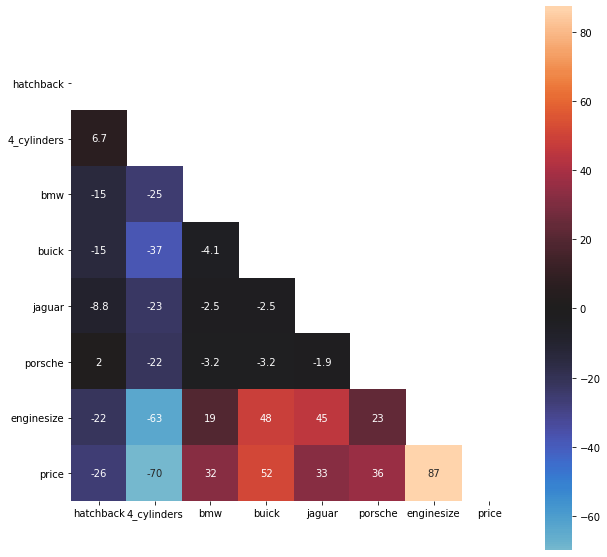

In [51]:
fig, ax = plt.subplots(figsize=(10,10))
corr = data_part01[f_p01_bin_selected + f_p01_num_selected + ['price']].corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr * 100, center=0, annot=True, square=True, ax=ax, mask=mask)

##### Моделирование
Вариант 1 - отобранные фичи по анализу выше

In [52]:
X = data_part01[f_p01_bin_selected + f_p01_num_selected]
y = data_part01['price']

# нормализуем данные
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# обучаем модель и предсказываем
estimator = LinearRegression()
estimator.fit(X, y)
y_predicted = estimator.predict(X)
data_part01['y_pred1'] = y_predicted
# оцениваем качество модели
print(f'MAE: {mean_absolute_error(y, y_predicted)}')
print(f'MSE: {mean_squared_error(y, y_predicted)}')
print(f'RMSE: {mean_squared_error(y, y_predicted) ** 0.5}')

MAE: 2128.207293849862
MSE: 8303833.010874093
RMSE: 2881.637210141848


In [53]:
estimator.intercept_, estimator.coef_

(13276.710570731706,
 array([ -615.58247399, -1356.65328277,  1407.61427385,  1465.60174236,
          323.34784016,  1653.65957518,  4469.93010661]))

In [54]:
pd.DataFrame(estimator.coef_, index=data_part01[f_p01_bin_selected + f_p01_num_selected].columns)[0:40]

,0
hatchback,-615.582474
4_cylinders,-1356.653283
bmw,1407.614274
buick,1465.601742
jaguar,323.347840
porsche,1653.659575
enginesize,4469.930107


In [55]:
residuals = y_predicted - y
residuals.mean()

-1.3664603324198141e-12

Вариант 2 - для отбора фичей использую recursive feature elimination (https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In [56]:
X = data_part01[f_p01_bin + f_p01_num]
y = data_part01['price']

selector = RFE(LinearRegression(), n_features_to_select=7, step=1)
selector = selector.fit(X, y)
y_predicted_2 = selector.predict(X)
data_part01['y_pred2'] = y_predicted_2
# оцениваем качество модели
print(f'MAE: {mean_absolute_error(y, y_predicted_2)}')
print(f'MSE: {mean_squared_error(y, y_predicted_2)}')
print(f'RMSE: {mean_squared_error(y, y_predicted_2) ** 0.5}')

MAE: 2630.6643606684493
MSE: 12629575.623090236
RMSE: 3553.8114219933273


In [57]:
pd.DataFrame(list(zip(X.columns,selector.support_,selector.ranking_)), columns=['feature', 'selected', 'ranking']).sort_values(by='ranking').head(10)

,feature,selected,ranking
37,8_cylinders,True,1
47,buick,True,1
13,rear,True,1
12,front,True,1
82,density,True,1
46,bmw,True,1
52,jaguar,True,1
45,audi,False,2
65,volvo,False,3
59,porsche,False,4


In [58]:
residuals = y_predicted_2 - y
residuals.mean()

1.774623808337421e-12

<AxesSubplot:>

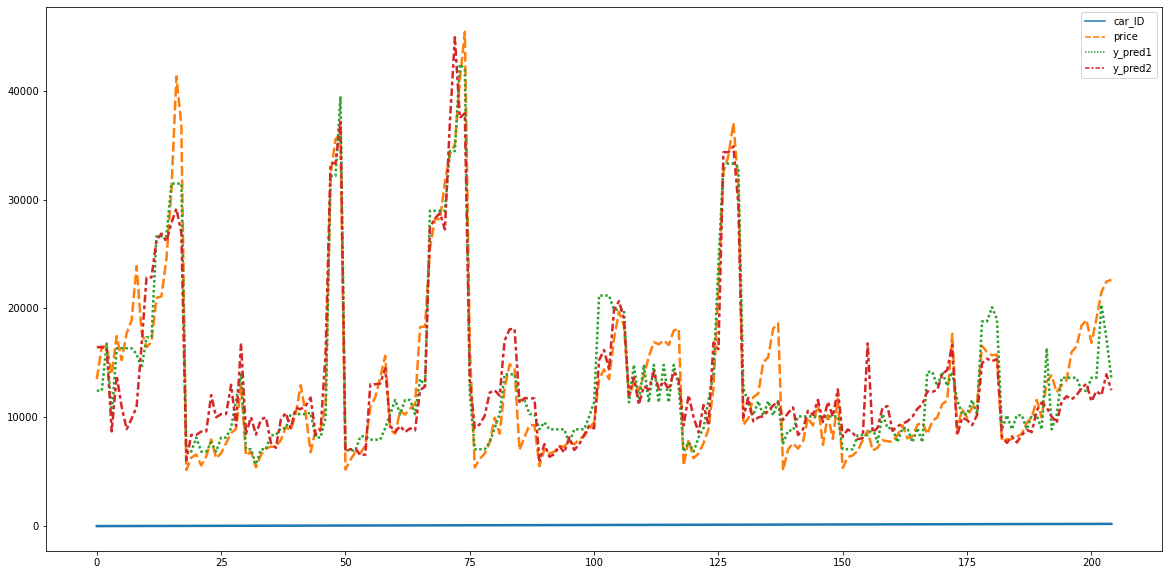

In [59]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=data_part01[['car_ID', 'price', 'y_pred1', 'y_pred2']], linewidth=2.5)

Вариант 3 - с train_test_split и линейная регрессия с регуляризацией

In [60]:
X = data_part01[f_p01_bin + f_p01_num]
y = data_part01['price']

# разбиваем на трейт и тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

# нормализуем данные
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# обучаем модель и предсказываем
estimator = Ridge()
estimator.fit(X_train, y_train)
y_train_pred = estimator.predict(X_train)
y_test_pred = estimator.predict(X_test)

# оцениваем качество модели
print('Train')
print(f'MAE: {mean_absolute_error(y_train, y_train_pred)}')
print(f'MSE: {mean_squared_error(y_train, y_train_pred)}')
print(f'RMSE: {mean_squared_error(y_train, y_train_pred) ** 0.5}')
print('Test')
print(f'MAE: {mean_absolute_error(y_test, y_test_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_test_pred)}')
print(f'RMSE: {mean_squared_error(y_test, y_test_pred) ** 0.5}')

Train
MAE: 902.4057918587615
MSE: 1400092.530565099
RMSE: 1183.2550572742543
Test
MAE: 1749.35234869011
MSE: 7004531.541357943
RMSE: 2646.6075533327457


- В целом, модель, основанная на аналитическом подборе переменных показала лучший результат.
- 3й вариант на трейне показал, вроде, хороший результат, но на тесте проявилось переобучение.

По поводу обогащения данного датасета.
- Отсутсвует информация о стране, валюте, годе цен.
- Нет информации, это отпускная цена производителя или цена дистрибьютора.
- Ценообразование автомобилей зависит не только от характеристик автомобиля, но и макроэкономических показателей конкретного рынка, стратегии компании и насколько производитель готов менять цены от рынка к рынку.
- Также на цены влиет таможенное регулирование, то есть цены на автомобили произведенные в стране и цены на те же самые модели машин, но произведенные в другой стране, могут отличаться друг от друга.

В связи с этим датасет обогащать не стала, модель цены построена в зависимости от характеристик автомобиля как товара "при прочих равных условиях".

Для моделирования выбрала именно 1й датасет, т.к. он мне показался интересным из-за обилия категориальных переменных.